In [1]:
import os
from operator import itemgetter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

import tensorflow as tf

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [2]:
from keras.layers import Embedding

# The Embedding layer requires a minimum of two inputs:
# The maximum word index plus one, or 1000, is the number of potential tokens.
# and the embeddings' dimensions, in this case 64.
embedd_lay = Embedding(1000, 64)
from keras.datasets import imdb
from keras import preprocessing
from keras.utils import pad_sequences

In [3]:

# The number of words that should be considered as features
features = 10000
# Remove the text after this number of words(from the top max_features most common words)
length = 150

# Data loading to integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

x_train = x_train[:100]
y_train = y_train[:100]

# The integer lists are now transformed into a 2D integer tensor with the shape of {(samples, maxlen)}.
x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)
from keras.models import Sequential
from keras.layers import Flatten, Dense

model1 = Sequential()
# In order to finally flatten the embedded inputs, the maximum length of the input to the Embedding layer is provided.
model1.add(Embedding(10000, 8, input_length=length))
# After the Embedding layer, our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings into a 2D tensor of shape
#`(samples, maxlen * 8)`
model1.add(Flatten())

# We add the classifier on top
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model1.summary()

history1 = model1.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 820ms/step - acc: 0.3875 - loss: 0.6949 - val_acc: 0.5000 - val_loss: 0.6967
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.8328 - loss: 0.6689 - val_acc: 0.5500 - val_loss: 0.6981
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.9336 - loss: 0.6508 - val_acc: 0.4500 - val_loss: 0.6985
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.9633 - loss: 0.6317 - val_acc: 0.4500 - val_loss: 0.6983
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.9594 - loss: 0.6152 - val_acc: 0.4500 - val_loss: 0.6986
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.9898 - loss: 0.6014 - val_acc: 0.5000 - val_loss: 0.6991
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.9898 - loss: 0.5819 - val_acc: 0.5000 - val_loss: 0.6998
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.9937 - loss: 0.5637 - val_acc: 0.5000 - val_loss: 0.7010
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 1.0000 - loss: 0.5496 -

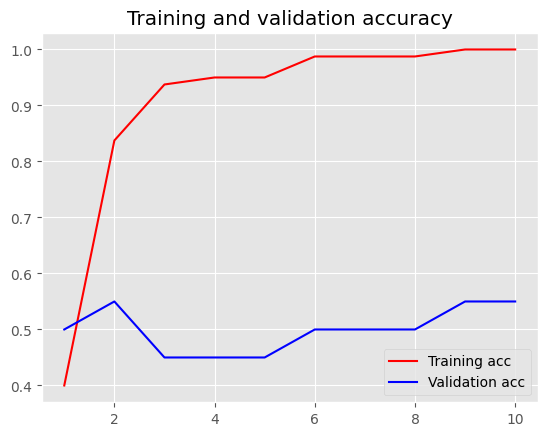

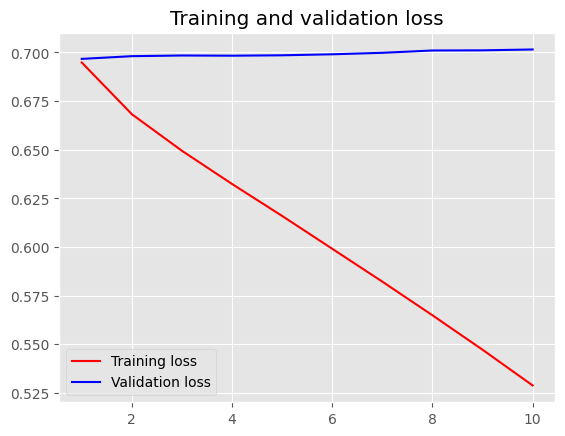

In [4]:
import matplotlib.pyplot as plt

# Train accuracy
accuracy = history1.history["acc"]
# Validation accuracy
validation_accuracy = history1.history["val_acc"]
# Train loss
Train_loss = history1.history["loss"]
# Validation loss
validation_loss = history1.history["val_loss"]


epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "red", label = "Training acc")
plt.plot(epochs, validation_accuracy, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss, "red", label = "Training loss")
plt.plot(epochs, validation_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [5]:
test_loss, test_acc = model1.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.4995 - loss: 0.6948
Test loss: 0.695190966129303
Test accuracy: 0.49559998512268066


In [6]:

features=10000
length=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:5000]
y_train = y_train[:5000]

In [7]:
model2 = Sequential()
model2.add(Embedding(10000, 8, input_length=length))
model2.add(Flatten())
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model2.summary()
history2 = model2.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - acc: 0.5081 - loss: 0.6927 - val_acc: 0.5980 - val_loss: 0.6873
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7644 - loss: 0.6664 - val_acc: 0.6830 - val_loss: 0.6554
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8171 - loss: 0.5936 - val_acc: 0.7640 - val_loss: 0.5781
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8671 - loss: 0.4794 - val_acc: 0.7970 - val_loss: 0.5046
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8907 - loss: 0.3731 - val_acc: 0.8100 - val_loss: 0.4538
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9218 - loss: 0.2864 - val_acc: 0.8170 - val_loss: 0.4240
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9373 - loss: 0.2318 - val_acc: 0.8130 - val_loss: 0.4099
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9619 - loss: 0.1781 - val_acc: 0.8210 - val_loss: 0.4031
Epoch 9/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - ac

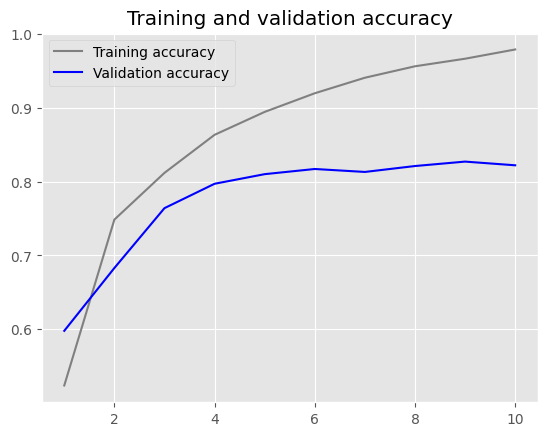

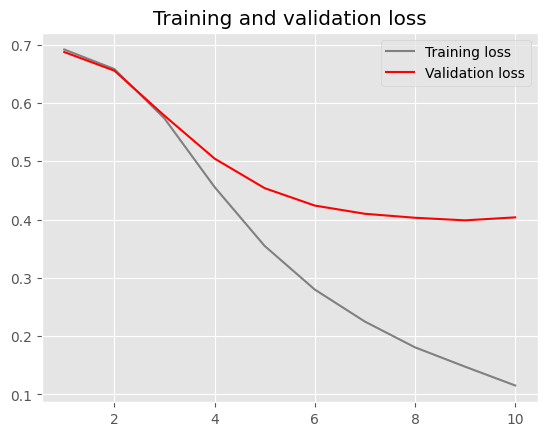

In [8]:
accuracy2 = history2.history['acc']
validation_accuracy2 = history2.history['val_acc']
Train_loss2 = history2.history['loss']
validation_loss2 = history2.history['val_loss']

epochs = range(1, len(accuracy2) + 1)

plt.plot(epochs, accuracy2, 'grey', label='Training accuracy')
plt.plot(epochs, validation_accuracy2, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, Train_loss2, 'grey', label='Training loss')
plt.plot(epochs, validation_loss2, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [9]:
test_loss2, test_accuracy2 = model2.evaluate(x_test, y_test)
print('Test loss:', test_loss2)
print('Test accuracy:', test_accuracy2)


782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8242 - loss: 0.3881
Test loss: 0.38274672627449036
Test accuracy: 0.8249599933624268


In [10]:
features=10000
length=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:1000]
y_train = y_train[:1000]

In [11]:
model3 = Sequential()
model3.add(Embedding(10000, 8, input_length=length))
model3.add(Flatten())
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model3.summary()
history3 = model3.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - acc: 0.4897 - loss: 0.6927 - val_acc: 0.5000 - val_loss: 0.6929
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7472 - loss: 0.6766 - val_acc: 0.5100 - val_loss: 0.6923
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8957 - loss: 0.6604 - val_acc: 0.5150 - val_loss: 0.6913
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9210 - loss: 0.6377 - val_acc: 0.5550 - val_loss: 0.6899
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9499 - loss: 0.6097 - val_acc: 0.5750 - val_loss: 0.6881
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9502 - loss: 0.5771 - val_acc: 0.5750 - val_loss: 0.6857
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9673 - loss: 0.5321 - val_acc: 0.5950 - val_loss: 0.6833
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9795 - loss: 0.4962 - val_acc: 0.6000 - val_loss: 0.6806
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9806 - loss:

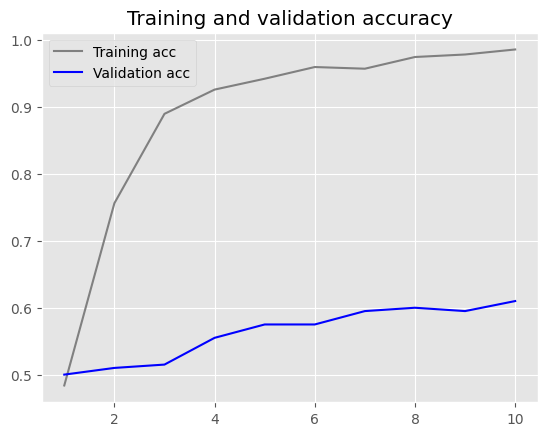

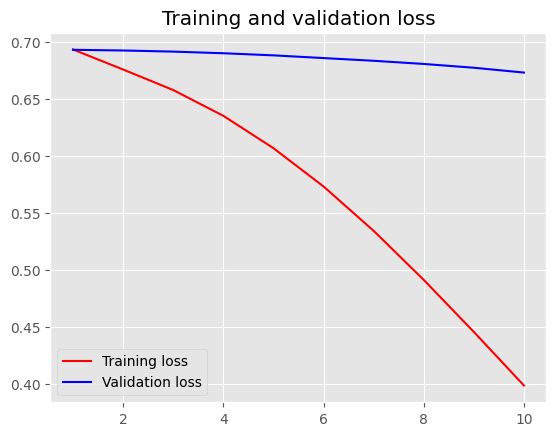

In [12]:
accuracy3 = history3.history["acc"]
validation_accuracy3 = history3.history["val_acc"]
Train_loss3 = history3.history["loss"]
validation_loss3 = history3.history["val_loss"]

epochs = range(1, len(accuracy3) + 1)

plt.plot(epochs, accuracy3, "grey", label = "Training acc")
plt.plot(epochs, validation_accuracy3, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss3, "red", label = "Training loss")
plt.plot(epochs, validation_loss3, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [13]:
test_loss3, test_accuracy3 = model3.evaluate(x_test, y_test)
print('Test loss:', test_loss3)
print('Test accuracy:', test_accuracy3)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.5859 - loss: 0.6736
Test loss: 0.6741658449172974
Test accuracy: 0.5798400044441223


In [14]:
features=10000
length=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=features)

x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:10000]
y_train = y_train[:10000]


In [15]:
model4 = Sequential()
model4.add(Embedding(10000, 8, input_length=length))
model4.add(Flatten())
model4.add(Dense(1, activation='sigmoid'))
model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model4.summary()
history4 = model4.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - acc: 0.5172 - loss: 0.6907 - val_acc: 0.6295 - val_loss: 0.6590
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.7724 - loss: 0.5989 - val_acc: 0.7845 - val_loss: 0.4895
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8479 - loss: 0.4099 - val_acc: 0.8425 - val_loss: 0.3730
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8933 - loss: 0.2994 - val_acc: 0.8565 - val_loss: 0.3352
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9081 - loss: 0.2486 - val_acc: 0.8635 - val_loss: 0.3211
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9316 - loss: 0.2094 - val_acc: 0.8645 - val_loss: 0.3202
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9468 - loss: 0.1670 - val_acc: 0.8485 - val_loss: 0.3466
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9589 - loss: 0.1408 - val_acc: 0.8530 - val_loss: 0.3402
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - ac

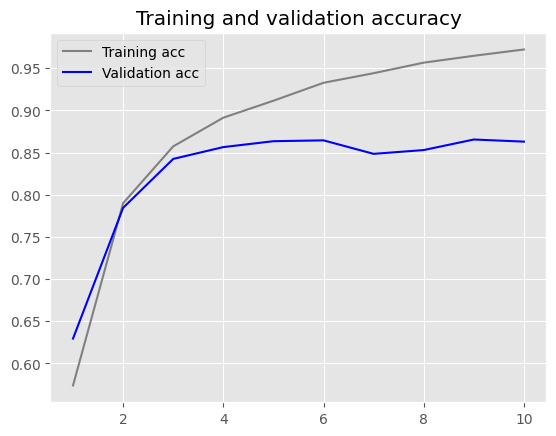

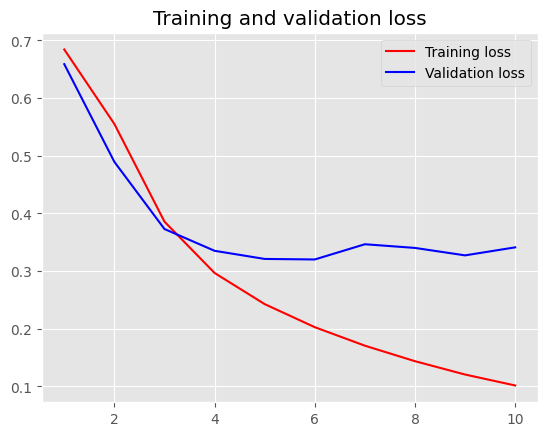

In [16]:
accuracy4 = history4.history["acc"]
validation_accuracy4 = history4.history["val_acc"]
Train_loss4 = history4.history["loss"]
validation_loss4 = history4.history["val_loss"]

epochs = range(1, len(accuracy4) + 1)

plt.plot(epochs, accuracy4, "grey", label = "Training acc")
plt.plot(epochs, validation_accuracy4, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss4, "red", label = "Training loss")
plt.plot(epochs, validation_loss4, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()


In [17]:
test_loss4, test_accuracy4 = model4.evaluate(x_test, y_test)
print('Test loss:', test_loss4)
print('Test accuracy:', test_accuracy4)


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.8494 - loss: 0.3603
Test loss: 0.35455265641212463
Test accuracy: 0.8517600297927856


In [18]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz
!rm -r aclImdb/train/unsup

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  35.0M      0  0:00:02  0:00:02 --:--:-- 35.0M


In [19]:
import os
import shutil

imdb = 'aclImdb'
training = os.path.join(imdb, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(training, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

length2 = 150  # Cut off review after 150 words
train_data = 100  # Training sample 100
valid_data = 10000  # Validation sample 10000
words = 10000  # Considers only the top 10000 words in the dataset

tokenizer1 = Tokenizer(num_words=words)
tokenizer1.fit_on_texts(texts)
sequences = tokenizer1.texts_to_sequences(texts)
word_index = tokenizer1.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length2)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

# Split data into training and validation set, but shuffle it, since samples are ordered:
# all negatives first, then all positives
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:train_data]
y_train = labels[:train_data]
x_validation = data[train_data:train_data+valid_data]
y_validation = labels[train_data:train_data+valid_data]

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [21]:
import numpy as np
import requests
from io import BytesIO
import zipfile

glove_url = 'https://nlp.stanford.edu/data/glove.6B.zip'  # URL to download GloVe embeddings
glove_zip = requests.get(glove_url)

# Unzip the contents
with zipfile.ZipFile(BytesIO(glove_zip.content)) as z:
    z.extractall('/content/glove')

# Loading GloVe embeddings into memory
embeddings_index = {}
with open('/content/glove/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [22]:
embedd_di = 100

embedding_matrix = np.zeros((words, embedd_di))
for word, i in word_index.items():
    embedd_vector = embeddings_index.get(word)
    if i < words:
        if embedd_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedd_vector

In [23]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(words, embedd_di, input_length=length2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import Constant

embedding_dim = embedding_matrix.shape[1]  # Set embedding dimension based on matrix
vocab_size = embedding_matrix.shape[0]  # Set vocab size based on matrix

# Define the model with an Embedding layer initialized with the embedding matrix
model = Sequential()
model.add(
    Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        embeddings_initializer=Constant(embedding_matrix),
        input_length=length2,
        trainable=False  # Set trainable to False directly if you want it non-trainable
    )
)

# Check the model summary to confirm the embedding layer has loaded weights
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import Constant

embedding_dim = embedding_matrix.shape[1]  # Set embedding dimension from matrix
vocab_size = embedding_matrix.shape[0]  # Set vocab size from matrix

# Define the model
model = Sequential()
model.add(
    Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        embeddings_initializer=Constant(embedding_matrix),
        input_length=length2,
        trainable=False
    )
)
model.add(GlobalAveragePooling1D())  # Reduces 3D tensor to 2D
model.add(Dense(1, activation='sigmoid'))  # Final output layer for binary classification

# Compile and fit the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_validation, y_validation)
)

# Save the model weights
model.save_weights('pre_trained_glove_model.weights.h5')


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 469ms/step - acc: 0.4701 - loss: 0.7203 - val_acc: 0.4983 - val_loss: 0.7102
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - acc: 0.4639 - loss: 0.7126 - val_acc: 0.4982 - val_loss: 0.7073
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - acc: 0.4889 - loss: 0.7069 - val_acc: 0.4981 - val_loss: 0.7057
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - acc: 0.4962 - loss: 0.7025 - val_acc: 0.4982 - val_loss: 0.7055
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - acc: 0.4920 - loss: 0.6991 - val_acc: 0.4982 - val_loss: 0.7047
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - acc: 0.4899 - loss: 0.7003 - val_acc: 0.4979 - val_loss: 0.7002
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - acc: 0.4660 - loss: 0.7005 - val_acc: 0.4973 - val_loss: 0.6980
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - acc: 0.5192 - loss: 0.6892 - val_acc: 0.4970 - val_loss: 0.6965
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - acc: 0.4870 - loss: 

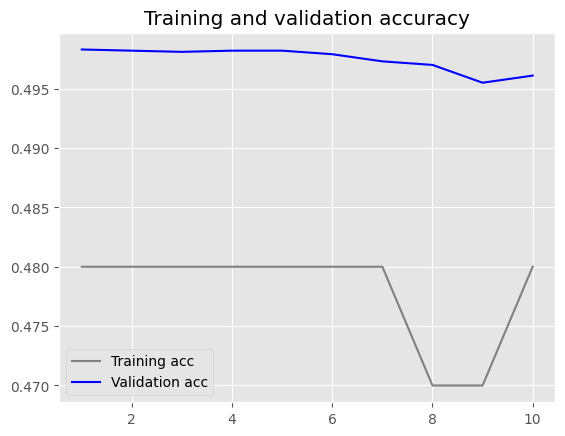

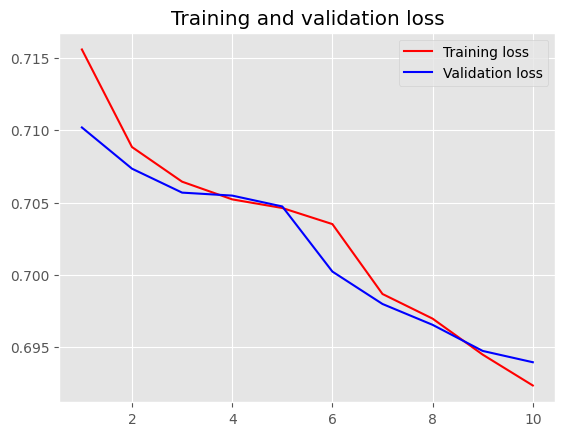

In [26]:
import matplotlib.pyplot as plt

accuracy = history.history['acc']
valid_accuracy = history.history['val_acc']
train_loss = history.history['loss']
valid_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'grey', label='Training acc')
plt.plot(epochs, valid_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'red', label='Training loss')
plt.plot(epochs, valid_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [27]:
test_loss, test_accuracy= model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.5134 - loss: 0.6925
Test loss: 0.6923531889915466
Test accuracy: 0.5182399749755859


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model11 = Sequential()
model11.add(Embedding(words, embedd_di, input_length=length2))
model11.add(Flatten())
model11.add(Dense(32, activation='relu'))
model11.add(Dense(1, activation='sigmoid'))

# Build the model explicitly by specifying an input shape
model11.build(input_shape=(None, length2))

# Load pretrained weights
model11.layers[0].set_weights([embedding_matrix])
model11.layers[0].trainable = False

# Compile and fit the model
model11.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history11 = model11.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_validation, y_validation)
)

# Save the model weights
model11.save_weights('pre_trained_glove_model.weights.h5')


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 578ms/step - acc: 0.4983 - loss: 3.8112 - val_acc: 0.5062 - val_loss: 0.7684
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 216ms/step - acc: 0.6866 - loss: 0.5121 - val_acc: 0.5016 - val_loss: 1.7334
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 215ms/step - acc: 0.7360 - loss: 0.6038 - val_acc: 0.4986 - val_loss: 1.2968
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - acc: 0.7222 - loss: 0.4575 - val_acc: 0.5332 - val_loss: 0.7509
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - acc: 0.9939 - loss: 0.1023 - val_acc: 0.5525 - val_loss: 0.7155
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - acc: 1.0000 - loss: 0.0672 - val_acc: 0.5625 - val_loss: 0.7195
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - acc: 1.0000 - loss: 0.0385 - val_acc: 0.5572 - val_loss: 0.7294
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - acc: 1.0000 - loss: 0.0261 - val_acc: 0.5523 - val_loss: 0.7414
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - acc: 1.0000 - loss: 

In [29]:
test_loss11, test_accuracy11 = model11.evaluate(x_test, y_test)
print('Test loss:', test_loss11)
print('Test accuracy:', test_accuracy11)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.5013 - loss: 0.8237
Test loss: 0.8236904740333557
Test accuracy: 0.4997200071811676


In [30]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [31]:
# Force the embedding layer to build its weights by calling build()
model11.layers[0].build(input_shape=(None, length2))


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 486ms/step - acc: 0.7781 - loss: 1.3694 - val_acc: 0.4982 - val_loss: 2.6874
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - acc: 0.9691 - loss: 0.0882 - val_acc: 0.5620 - val_loss: 0.8197
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - acc: 1.0000 - loss: 0.0039 - val_acc: 0.5641 - val_loss: 0.8125
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - acc: 1.0000 - loss: 0.0033 - val_acc: 0.5585 - val_loss: 0.8383
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 215ms/step - acc: 1.0000 - loss: 0.0037 - val_acc: 0.5635 - val_loss: 0.8175
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - acc: 1.0000 - loss: 0.0028 - val_acc: 0.5682 - val_loss: 0.8208
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - acc: 1.0000 - loss: 0.0025 - val_acc: 0.5685 - val_loss: 0.8199
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 218ms/step - acc: 1.0000 - loss: 0.0023 - val_acc: 0.5687 - val_loss: 0.8212
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - acc: 1.0000 - loss: 

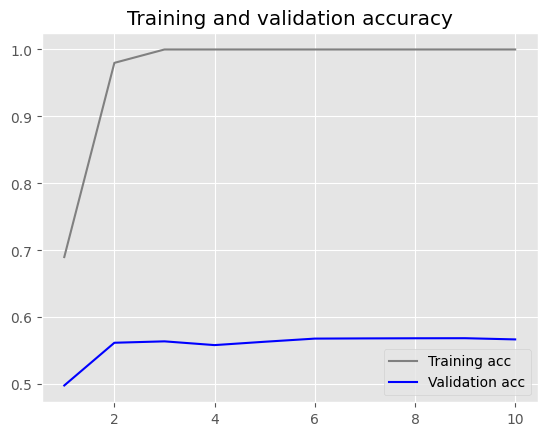

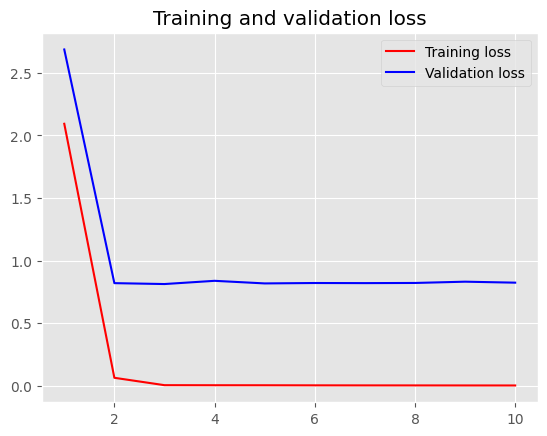

In [32]:
# Build the embedding layer to initialize weights
model11.layers[0].build(input_shape=(None, length2))

# Set the pre-trained embedding matrix as weights for the embedding layer
model11.layers[0].set_weights([embedding_matrix])
model11.layers[0].trainable = False

# Compile the model
model11.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])

# Fit the model
history11 = model11.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_validation, y_validation)
)

# Save the weights with the required file name
model11.save_weights('pre_trained_glove_model.weights.h5')

# Plotting training and validation results
import matplotlib.pyplot as plt
accuracy11 = history11.history['acc']
valid_acc11 = history11.history['val_acc']
train_loss11 = history11.history['loss']
valid_loss11 = history11.history['val_loss']

epochs = range(1, len(accuracy11) + 1)

plt.plot(epochs, accuracy11, 'grey', label='Training acc')
plt.plot(epochs, valid_acc11, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss11, 'red', label='Training loss')
plt.plot(epochs, valid_loss11, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [33]:
# Evaluate the model
test_loss11, test_accuracy11 = model11.evaluate(x_test, y_test)

# Print test loss and accuracy
print('Test loss:', test_loss11)
print('Test accuracy:', test_accuracy11)


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.5111 - loss: 0.8893
Test loss: 0.8929165005683899
Test accuracy: 0.506600022315979


Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - acc: 0.5034 - loss: 1.7070 - val_acc: 0.4984 - val_loss: 0.6947
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.6059 - loss: 0.8641 - val_acc: 0.5021 - val_loss: 0.7281
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.6829 - loss: 0.5971 - val_acc: 0.5035 - val_loss: 0.7725
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.7775 - loss: 0.4810 - val_acc: 0.4982 - val_loss: 0.9469
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.8225 - loss: 0.4066 - val_acc: 0.4951 - val_loss: 0.9769
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.8756 - loss: 0.3323 - val_acc: 0.5020 - val_loss: 0.9066
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.9411 - loss: 0.2323 - val_acc: 0.5062 - val_loss: 0.9621
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.9602 - loss: 0.1409 - val_acc: 0.5055 - val_loss: 0.9087
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.9827

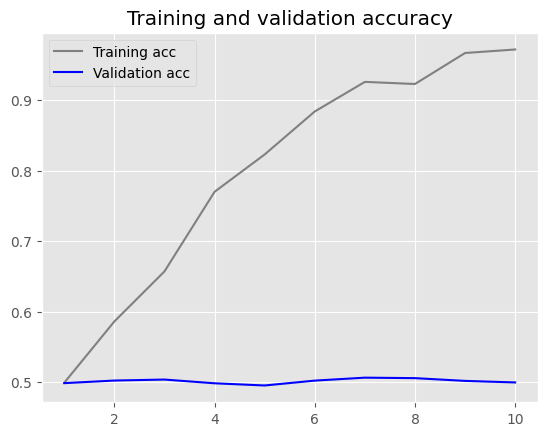

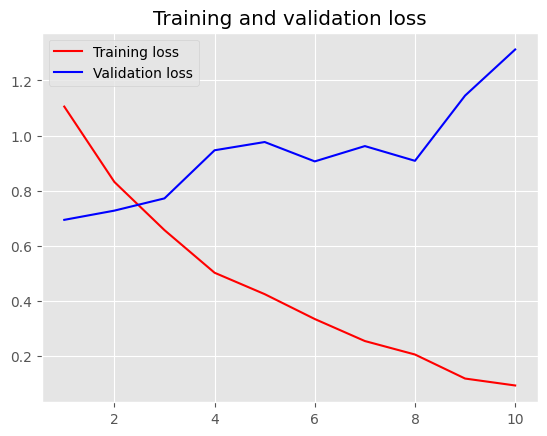

In [34]:
import numpy as np

length = 150
train_data = 1000 #Trains on 1000 samples
valid_data = 10000
words = 10000

tokenizer3 = Tokenizer(num_words=words)
tokenizer3.fit_on_texts(texts)
sequences = tokenizer3.texts_to_sequences(texts)
word_index = tokenizer3.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:train_data]
y_train = labels[:train_data]
x_val = data[train_data:train_data+valid_data]
y_val = labels[train_data:train_data+valid_data]
embedding_dim = 100
embedd_matrix = np.zeros((words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < words:
        if embedding_vector is not None:

            embedd_matrix[i] = embedding_vector


model12 = Sequential()
model12.add(Embedding(words, embedding_dim, input_length=length))
model12.add(Flatten())
model12.add(Dense(32, activation='relu'))
model12.add(Dense(1, activation='sigmoid'))
model12.summary()

# Explicitly build the embedding layer to initialize weights
model12.layers[0].build(input_shape=(None, length))

# Set the pre-trained embedding matrix as weights
model12.layers[0].set_weights([embedd_matrix])
model12.layers[0].trainable = False

# Compile the model
model12.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])
# Fit the model
history12 = model12.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val)
)
model12.save_weights('pre_trained_glove_model.weights.h5')
import matplotlib.pyplot as plt

acc12 = history12.history['acc']
val_acc12 = history12.history['val_acc']
loss12 = history12.history['loss']
val_loss12 = history12.history['val_loss']

epochs = range(1, len(acc12) + 1)

plt.plot(epochs, acc12, 'grey', label='Training acc')
plt.plot(epochs, val_acc12, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss12, 'red', label='Training loss')
plt.plot(epochs, val_loss12, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [35]:
test_loss12, test_accuracy12 = model12.evaluate(x_test, y_test)
print('Test loss:', test_loss12)
print('Test accuracy:', test_accuracy12)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.5004 - loss: 1.2829
Test loss: 1.2706331014633179
Test accuracy: 0.504800021648407


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.5102 - loss: 1.3218 - val_accuracy: 0.5003 - val_loss: 0.6932
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5537 - loss: 0.7024 - val_accuracy: 0.4992 - val_loss: 0.7632
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5504 - loss: 0.8166 - val_accuracy: 0.4966 - val_loss: 0.7363
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7089 - loss: 0.5677 - val_accuracy: 0.4997 - val_loss: 1.0508
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7129 - loss: 0.5947 - val_accuracy: 0.4972 - val_loss: 0.9656
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8359 - loss: 0.3445 - val_accuracy: 0.4988 - val_loss: 0.7890
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9320 - loss: 0.2403 - val_accuracy: 0.4928 - val_loss: 0.8228
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9666 - loss: 0.1797 - val_accuracy: 0.4992 - v

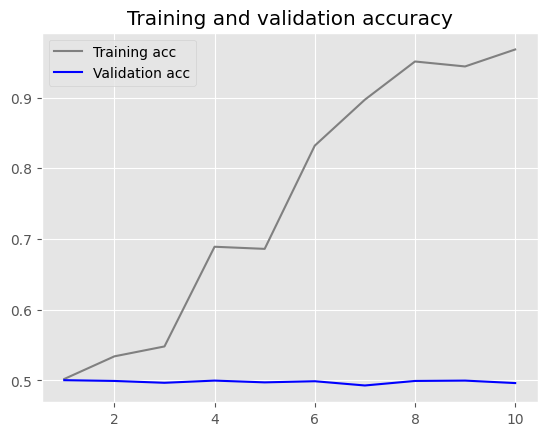

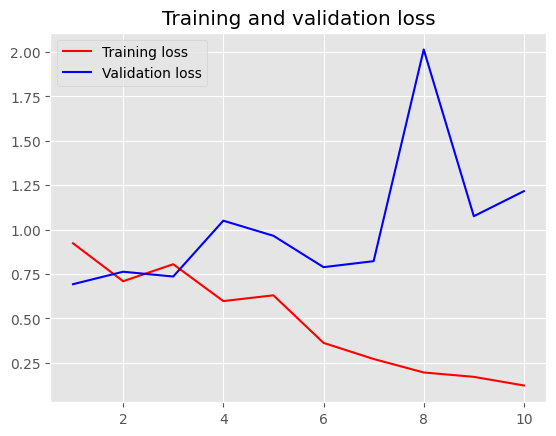

In [37]:
# Define the parameters
words = 10000  # Example: size of the vocabulary
embedd_dim = 100  # Example: dimensionality of the embedding vectors
length = 50  # Example: maximum length of input sequences

# Now you can create the model
model13 = Sequential()
model13.add(Embedding(words, embedd_dim, input_length=length))
model13.add(Flatten())
model13.add(Dense(32, activation='relu'))
model13.add(Dense(1, activation='sigmoid'))
model13.summary()

# Build and set the embedding matrix (make sure embedd_matrix is defined)
# Assuming embedd_matrix is defined elsewhere in your code
model13.layers[0].build(input_shape=(None, length))
model13.layers[0].set_weights([embedd_matrix])
model13.layers[0].trainable = False

# Compile the model
model13.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])  # Use 'accuracy' instead of 'acc'

# Train the model
history13 = model13.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val)
)

# Save weights
model13.save_weights('pre_trained_glove_model.weights.h5')

# Plot results
import matplotlib.pyplot as plt

accuracy13 = history13.history['accuracy']  # Use 'accuracy' instead of 'acc'
valid_acc13 = history13.history['val_accuracy']  # Use 'val_accuracy' instead of 'val_acc'
loss13 = history13.history['loss']
valid_loss13 = history13.history['val_loss']

epochs = range(1, len(accuracy13) + 1)

plt.plot(epochs, accuracy13, 'grey', label='Training acc')
plt.plot(epochs, valid_acc13, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss13, 'red', label='Training loss')
plt.plot(epochs, valid_loss13, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [38]:
test_loss13, test_accuracy13 = model13.evaluate(x_test, y_test)
print('Test loss:', test_loss13)
print('Test accuracy:', test_accuracy13)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5072 - loss: 1.1841
Test loss: 1.199947714805603
Test accuracy: 0.5005199909210205
